# NASA Exoplanet Data Analysis
### CMPS530 | Final Project | Robert Biebrich | 2023

## Introduction:
One of the most astounding examples of scientific progress in the last century has been the discovery and successive rapid catalogging of inumerable planets outside our solar system. These planets, called extrasolar planets or exoplanets for short, are alien worlds foreign to us in just about every way imaginable. They orbit distant stars which they call their sun or suns, as many of the systems contain more than one star! Many of them formed in a rather different neighborhood of the galaxy than our own and may hold new and remarkable insights into the nature of the universe we share.

Finding and studying exoplanets can serve two main enterprises, both of which speak to some of the biggest questions we have as a species: First, are we alone in the universe or is there other life out there? Second, is there any other habitable world besides Earth on which, in the far off future, humans might be able to explore and settle? These ideas may sound like science fiction, and for now they are, but modern science and technology have shown us that they are possible and they are worth our efforts to explore.

In [70]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

The table downloaded from the NASA Exoplanet Archive looks like this:

In [84]:
# Importing the data as a Pandas DataFrame
raw_data = pd.read_csv('NASA-Exoplanet-Archive.csv')
raw_data.head(5)

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,disc_instrument,...,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
1,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
2,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
3,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Coude Echelle Spectrograph,...,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,125.3210,1.9765,-1.9765
4,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Coude Echelle Spectrograph,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.3210,1.9765,-1.9765


However, many of the planets are listed multiple times, as this database has archived each separate finding of each exoplanet. So for our purposes I am going to group them by name, keeping only the first reported finding of each exoplanet. Our new table, which I will be working with for the rest of the analysis, looks like this:

In [72]:
# Cleaning the raw data to take first instance of each planet only
data = pd.DataFrame(raw_data.groupby('pl_name').first()).reset_index()
data.head(5)

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,disc_instrument,...,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,Coude Echelle Spectrograph,...,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
1,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Coude Echelle Spectrograph,...,0.07,-0.07,0.0,1.56,0.54,-0.54,0.0,125.3210,1.9765,-1.9765
2,14 And b,14 And,1,1,0,0,Radial Velocity,2008,Okayama Astrophysical Observatory,HIDES Echelle Spectrograph,...,0.06,-0.07,0.0,NaN,NaN,NaN,NaN,75.4392,0.7140,-0.7140
3,14 Her b,14 Her,1,2,0,0,Radial Velocity,2002,W. M. Keck Observatory,HIRES Spectrometer,...,0.09,-0.09,0.0,3.90,NaN,NaN,0.0,17.9323,0.0073,-0.0073
4,16 Cyg B b,16 Cyg B,3,1,0,0,Radial Velocity,1996,Multiple Observatories,Multiple Instruments,...,0.03,-0.03,0.0,NaN,NaN,NaN,NaN,21.1397,0.0110,-0.0111


## Methods:
In order to address the big questions I've posed in the introduction, I will be employing the help of numerous modules. I have imported and cleaned the data (originally a .csv file) using `pandas`. Most of the visualizations (such as bar graphs and scatter plots) are done using `matplotlib`. Interpolation was done in `scipy` and calculations were aided by `numpy`.

## Results:


In order to find exoplanets, both in  our search for life and our quest for new homes among the stars, it would serve us well to cast a wide net. There are hundreds of billions of stars in our galaxy, the Milky Way! While we can only glimpse a small fraction of those with modern technology, it is nonetheless worth it to figure out what our most effective methods are, and invest in those to maximize our succeess and further our search.

In [73]:
group_by_methods = data.groupby('discoverymethod').count()
best_method = group_by_methods.sort_values('pl_name', ascending=False)['pl_name']
best_method.head(3)

discoverymethod
Transit            4146
Radial Velocity    1071
Microlensing        204
Name: pl_name, dtype: int64

In [74]:
best_method.head(3).sum()/best_method.sum()*100

97.55263631455821

We'll only take a look at the top 3 methods since a quick calculation can tell us that these methods are responsible for 97.55% of all the discoveries:
* **Transit** - this method is by far the most fruitful, nearly 4 times as many discoveries as the next most successful method. The transit method entails carefully observing the same star for a while and looking for preiodic dips in its brightness. These dips are caused by a planet passing in front of the star. The magnitude of the dip tells us the size of the planet and the period between the dips can tell us about the planet's orbit.
* **Radial Velocity** - coming in at a strong second, the radial velocity or Doppler method. This method looks for shifts in starlight that occur if a star is wobbling. These wobbles, if detected are the result of a planet whose gravity is tugging on the star, making small changes to its radial velocity.
* **Microlensing** - our third most successful method is called gravitational microlensing. Without drilling to bedrock on the topic of Einstein's General Relativty, the microlensing method exploits a gravity's ability to bend light. Some high mass objects (such as large stars or black holes) have such strong gravity that the light from stars behind them appears magnified as if by a lens. This is called gravitational lensing and it can make it easier for our space telescopes to spot exoplanets.

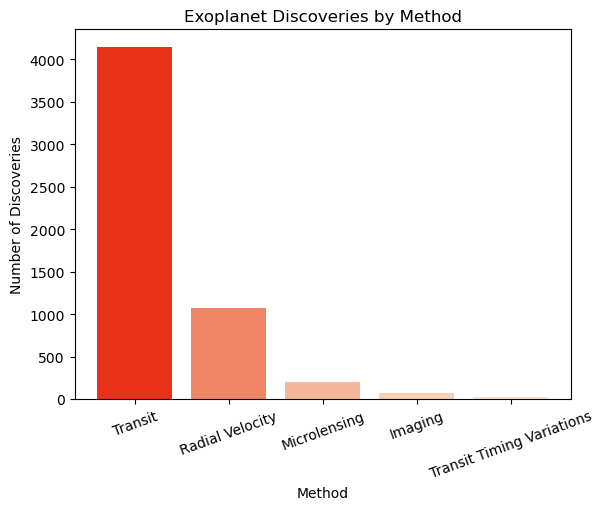

In [75]:
def best_methods_graph():
    x = list(best_method.head(5).index)
    y = best_method.head(5)
    colors = [(0.9, 0.1, 0.0, 0.9), (0.9, 0.2, 0.0, 0.6),
              (0.9, 0.3, 0.0, 0.4), (0.9, 0.4, 0.0, 0.3), 
              (0.9, 0.5, 0.0, 0.2)]

    fig, ax = plt.subplots()
    ax.bar(x, y, color=colors)
    plt.xlabel('Method')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries by Method')
    plt.xticks(rotation=20)

    plt.show()


best_methods_graph()

Well now that we know what methods will aid us in our quest for habitable exoplanets, lets take a look at what technologies have been most successful at employing these methods...

In [76]:
group_by_instrument = data.groupby('disc_instrument').count()
most_successful_instrument = group_by_instrument.sort_values('pl_name', ascending=False)['pl_name']
most_successful_instrument.head(5)

disc_instrument
Kepler CCD Array        3326
TESS CCD Array           410
Multiple Instruments     329
HARPS Spectrograph       220
HIRES Spectrometer       176
Name: pl_name, dtype: int64

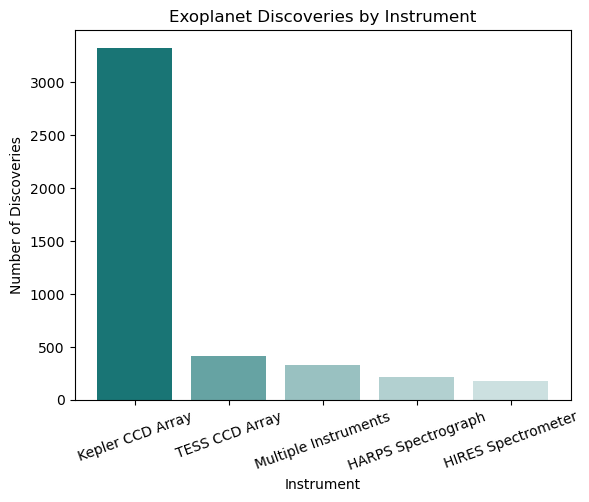

In [77]:
def discoveries_per_instrument():
    x = list(most_successful_instrument.head(5).index)
    y = most_successful_instrument.head(5)
    colors = [(0.0, 0.4, 0.4, 0.9), (0.0, 0.4, 0.4, 0.6),
              (0.0, 0.4, 0.4, 0.4), (0.0, 0.4, 0.4, 0.3), 
               (0.0, 0.4, 0.4, 0.2)]

    fig, ax = plt.subplots()
    ax.bar(x, y, color=colors)
    plt.xlabel('Instrument')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries by Instrument')
    plt.xticks(rotation=20)

    plt.show()

discoveries_per_instrument()

It's clear from this chart that NASA's Kepler spacecraft is high and above the breadwinner when it comes to exoplanet discoveries. Given what we've already established, it won't surprise you to learn that Kepler's primary method of exoplanet detection is the transit method. While none of the other instruments come close to Kepler's numbers, it is worth noting that the top two (NASA's TESS being the second) are both spacecraft. Now we not only have a good idea of what methods are most prolific, but also what technologies we should invest in to best carry out these methods.

Happily, the smart people at NASA, ESA, and other space agencies know this and are making preciesely those investments. This raises the question: how many exoplanets can we expect to discover down the line? Let's exclude the possiblity that we may invent new methods which could greatly increase the rate and scope of exoplanet discovery, and base our prediction on the current rates of discovery.

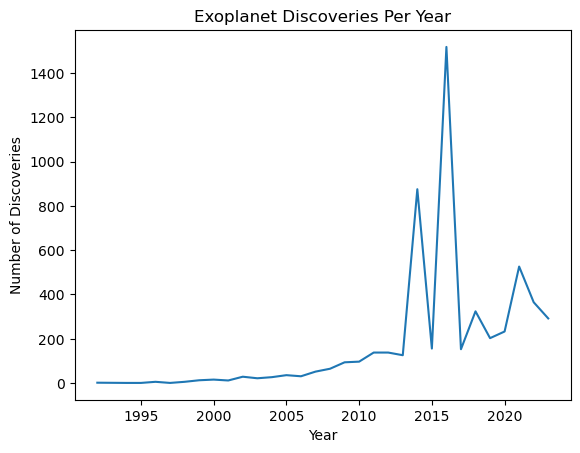

In [78]:
discoveries_per_year = data.groupby('disc_year').count()

def discoveries_per_year_plot():
    plt.plot(discoveries_per_year['pl_name'])
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries Per Year')

    plt.show()

discoveries_per_year_plot()

Here we can see the trend of exoplanet discoveries over the last few decades. At first glance you might think this looks far too chaotic to give us a nice extrapolation into the future. But if we look closer, we can see that the offending irregularities are really just two major spikes in the years 2014 and 2016.

In [79]:
biggest_year = discoveries_per_year.sort_values('pl_name', ascending=False)['pl_name']    
biggest_year.head(5)

disc_year
2016    1517
2014     875
2021     526
2022     365
2018     324
Name: pl_name, dtype: int64

 Why might that be? An obvious guess might be that these could be years when a new space telescope was launched. However, Kepler was launched in 2009 and TESS was not until 2018. We know from previous analysis that Kepler is the only instrument with enough discoveries under its belt to cause spikes of this size, but perhaps its data was being released in waves and that is messing with our rate of discovery. Let's take another look, isolating Kepler this time...

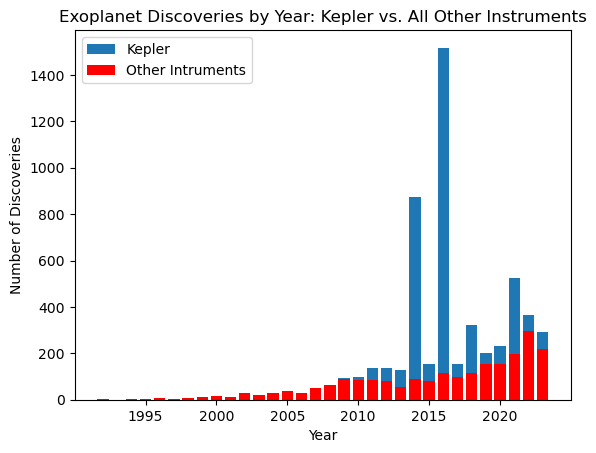

In [80]:
not_kepler_filter = data['disc_instrument'] != 'Kepler CCD Array'
not_kepler_disc_per_year = data[not_kepler_filter].groupby('disc_year').count()['pl_name']

def kepler():

    x1 = list(discoveries_per_year['pl_name'].index)
    y1 = discoveries_per_year['pl_name']

    x2 = list(not_kepler_disc_per_year.index)
    y2 = not_kepler_disc_per_year

    fig, ax = plt.subplots()
    ax.bar(x1, y1)
    ax.bar(x2, y2, color='red')
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries by Year: Kepler vs. All Other Instruments')
    plt.legend(['Kepler', 'Other Intruments'])

    plt.show()

kepler()

It is clear from this chart (which shows Kepler's discoveries stacked *on top* of those of all the other instruments) that Kepler is indeed reponsible for the spikes, and that, despite being operational for almost 10 years, nearly all of its discoveries are clumped into only 2 years. We are forced to conclude that the release of Kepler's discoveries and the actual date those discoveries were made are treated as the same by this databse, even when they almost surely are not. This hypothesis is supported by the fact that the data show Kepler making discoveries up until the present, when in reality it was retired in 2018. Since these artifical dates are unhelpful to the predictions we are trying to make, let's disregard Kepler's data for now. The resulting graph looks like this:

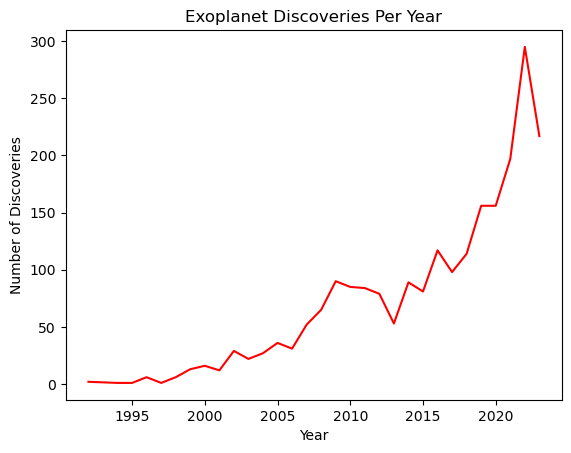

In [81]:
def not_kepler_plot():

    plt.plot(not_kepler_disc_per_year, color='red')
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries Per Year')

    plt.show()

not_kepler_plot()

That's certainly an improvement! Now let's extrapolate this into the future. How many exoplanets will we discover 5 years from now? What about 10? 50? 100?

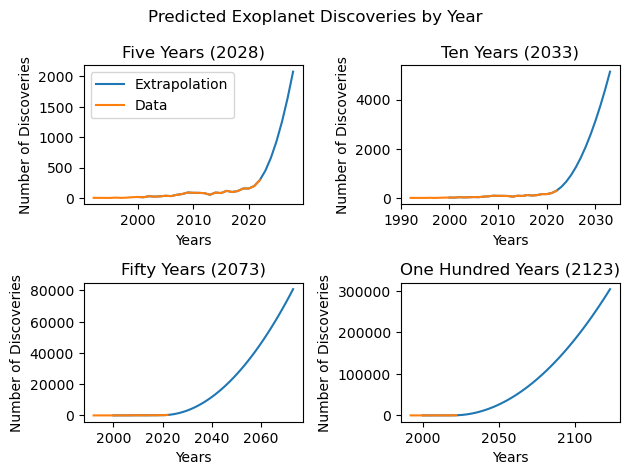

In [101]:
def extrapolate():

    x = list(not_kepler_disc_per_year.index)[:-1]
    y = list(not_kepler_disc_per_year)[:-1]
    func = interp1d(x, y, axis=0, bounds_error=False, kind='quadratic', fill_value='extrapolate')

    fig, axs = plt.subplots(2, 2)
    fig.suptitle('Predicted Exoplanet Discoveries by Year')

    x5 = list(range(2000, 2029))
    y5 = func(x5)

    axs[0, 0].plot(x5, y5)
    axs[0, 0].plot(x, y)
    axs[0, 0].set_title('Five Years (2028)')
    axs[0, 0].legend(['Extrapolation', 'Data'])

    x10 = list(range(2000, 2034))
    y10 = func(x10)
    axs[0, 1].plot(x10, y10)
    axs[0, 1].plot(x, y)
    axs[0, 1].set_title('Ten Years (2033)')


    x50 = list(range(2000, 2074))
    y50 = func(x50)
    axs[1, 0].plot(x50, y50)
    axs[1, 0].plot(x, y)
    axs[1, 0].set_title('Fifty Years (2073)')

    x100 = list(range(2000, 2124))
    y100 = func(x100)
    axs[1, 1].plot(x100, y100)
    axs[1, 1].plot(x, y)
    axs[1, 1].set_title('One Hundred Years (2123)')

    for ax in axs.flat:
        ax.set(xlabel='Years', ylabel='Number of Discoveries')
    fig.tight_layout()

    plt.show()

extrapolate()

While these graphs are far from a complete predictive model, they serve as nice illustrations for what the future of exoplanet discovery may look like.

Both of the main questions we are investigating are best answered in part by searching for planets we deem habitable for life. This search requires us to define criteria for what conditions we beleive are necessary for a planet to give rise to and sustain life. These criteria are of course based entirely on Earth life, as it is the only kind of life we know of. And while it is easy to imagine that alien life may have rather different attributes and therefore require rather different conditions, we have to narrow our search somehow. So looking for framiliar kinds of life seems like a practical place to start.

## LIST CRITERIA
